In [ ]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
conv = nn.Conv2d(in_channels=1, out_channels=1,kernel_size=3)
conv

Conv2d(1, 1, kernel_size=(3, 3), stride=(1, 1))

In [ ]:
conv.state_dict()['weight'][0][0]=torch.tensor([[1.0,0,-1.0],[2.0,0,-2.0],[1.0,0.0,-1.0]])
conv.state_dict()['bias'][0]=0.0
conv.state_dict()

OrderedDict([('weight',
              tensor([[[[ 1.,  0., -1.],
                        [ 2.,  0., -2.],
                        [ 1.,  0., -1.]]]])),
             ('bias', tensor([0.]))])

In [ ]:
image=torch.zeros(1,1,5,5)
image[0,0,:,2]=1
image

tensor([[[[0., 0., 1., 0., 0.],
          [0., 0., 1., 0., 0.],
          [0., 0., 1., 0., 0.],
          [0., 0., 1., 0., 0.],
          [0., 0., 1., 0., 0.]]]])

In [ ]:
z=conv(image)
z

tensor([[[[-4.,  0.,  4.],
          [-4.,  0.,  4.],
          [-4.,  0.,  4.]]]], grad_fn=<ConvolutionBackward0>)

# $$M_{new}=M-K+1$$


In [ ]:
K=2
conv1 = nn.Conv2d(in_channels=1, out_channels=1,kernel_size=K)
conv1.state_dict()['weight'][0][0]=torch.tensor([[1.0,1.0],[1.0,1.0]])
conv1.state_dict()['bias'][0]=0.0
conv1.state_dict()
conv1

Conv2d(1, 1, kernel_size=(2, 2), stride=(1, 1))

In [ ]:
M=4
image1=torch.ones(1,1,M,M)

<img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0110EN/notebook_images%20/chapter%206/6.1.1kernal2.png" width="500," align="center">


In [ ]:
z1=conv1(image1)
print("z1:",z1)
print("shape:",z1.shape[2:4])

z1: tensor([[[[4., 4., 4.],
          [4., 4., 4.],
          [4., 4., 4.]]]], grad_fn=<ConvolutionBackward0>)
shape: torch.Size([3, 3])


$$M_{new}=\dfrac{M-K}{stride}+1$$


In [ ]:
conv3 = nn.Conv2d(in_channels=1, out_channels=1,kernel_size=2,stride=2)

conv3.state_dict()['weight'][0][0]=torch.tensor([[1.0,1.0],[1.0,1.0]])
conv3.state_dict()['bias'][0]=0.0
conv3.state_dict()

OrderedDict([('weight',
              tensor([[[[1., 1.],
                        [1., 1.]]]])),
             ('bias', tensor([0.]))])

$$M'=M+2 \times padding$$
$$M_{new}=M'-K+1$$


In [ ]:
conv4 = nn.Conv2d(in_channels=1, out_channels=1,kernel_size=2,stride=3)
conv4.state_dict()['weight'][0][0]=torch.tensor([[1.0,1.0],[1.0,1.0]])
conv4.state_dict()['bias'][0]=0.0
conv4.state_dict()
z4=conv4(image1)
print("z4:",z4)
print("z4:",z4.shape[2:4])

z4: tensor([[[[4.]]]], grad_fn=<ConvolutionBackward0>)
z4: torch.Size([1, 1])


In [ ]:
conv5 = nn.Conv2d(in_channels=1, out_channels=1,kernel_size=2,stride=3,padding=1)

conv5.state_dict()['weight'][0][0]=torch.tensor([[1.0,1.0],[1.0,1.0]])
conv5.state_dict()['bias'][0]=0.0
conv5.state_dict()
z5=conv5(image1)
print("z5:",z5)
print("z5:",z4.shape[2:4])

z5: tensor([[[[1., 2.],
          [2., 4.]]]], grad_fn=<ConvolutionBackward0>)
z5: torch.Size([1, 1])


# Multiple channels

In [ ]:
conv1 = nn.Conv2d(in_channels=1, out_channels=3,kernel_size=3)

In [ ]:
conv1.state_dict()['weight'][1][0]

tensor([[ 0.0266, -0.2326,  0.2158],
        [-0.0399, -0.2722, -0.2289],
        [ 0.2479,  0.2179, -0.2044]])

In [ ]:
Gx=torch.tensor([[1.0,0,-1.0],[2.0,0,-2.0],[1.0,0.0,-1.0]])
Gy=torch.tensor([[1.0,2.0,1.0],[0.0,0.0,0.0],[-1.0,-2.0,-1.0]])

conv1.state_dict()['weight'][0][0]=Gx
conv1.state_dict()['weight'][1][0]=Gy
conv1.state_dict()['weight'][2][0]=torch.ones(3,3)
conv1.state_dict()['weight']

tensor([[[[ 1.,  0., -1.],
          [ 2.,  0., -2.],
          [ 1.,  0., -1.]]],


        [[[ 1.,  2.,  1.],
          [ 0.,  0.,  0.],
          [-1., -2., -1.]]],


        [[[ 1.,  1.,  1.],
          [ 1.,  1.,  1.],
          [ 1.,  1.,  1.]]]])

In [ ]:
conv1.state_dict()['bias'][:]=torch.tensor([0.0,0.0,0.0])
conv1.state_dict()['bias']

tensor([0., 0., 0.])

In [ ]:
image=torch.zeros(1,1,5,5)
image[0,0,:,2]=1
image

tensor([[[[0., 0., 1., 0., 0.],
          [0., 0., 1., 0., 0.],
          [0., 0., 1., 0., 0.],
          [0., 0., 1., 0., 0.],
          [0., 0., 1., 0., 0.]]]])

In [ ]:
conv_image1 = conv1(image)
conv_image1

tensor([[[[-4.,  0.,  4.],
          [-4.,  0.,  4.],
          [-4.,  0.,  4.]],

         [[ 0.,  0.,  0.],
          [ 0.,  0.,  0.],
          [ 0.,  0.,  0.]],

         [[ 3.,  3.,  3.],
          [ 3.,  3.,  3.],
          [ 3.,  3.,  3.]]]], grad_fn=<ConvolutionBackward0>)

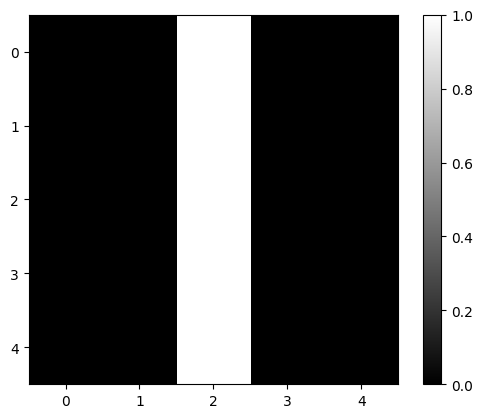

In [ ]:
plt.imshow(image[0,0,:,:].numpy(), interpolation='nearest', cmap=plt.cm.gray)
plt.colorbar()
plt.show()

In [ ]:
conv_image1.shape

torch.Size([1, 3, 3, 3])

tensor([[-4.,  0.,  4.],
        [-4.,  0.,  4.],
        [-4.,  0.,  4.]], grad_fn=<UnbindBackward0>)


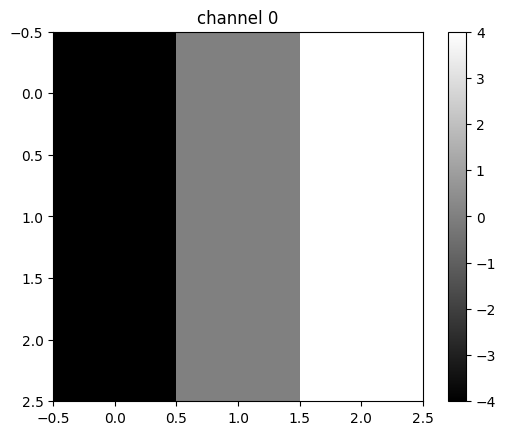

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]], grad_fn=<UnbindBackward0>)


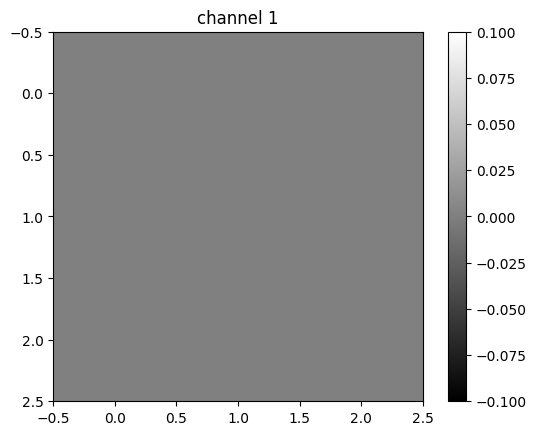

tensor([[3., 3., 3.],
        [3., 3., 3.],
        [3., 3., 3.]], grad_fn=<UnbindBackward0>)


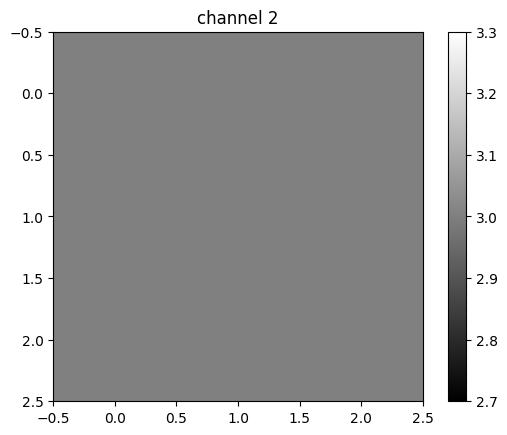

In [ ]:
for channel,image in enumerate(conv_image1[0]):
    plt.imshow(image.detach().numpy(), interpolation='nearest', cmap=plt.cm.gray)
    print(image)
    plt.title("channel {}".format(channel))
    plt.colorbar()
    plt.show()